In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('~/Downloads/shot_logs.csv') # read in the csv file

df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [2]:
df.describe()

/Users/danh/anaconda/envs/machinelearning/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,NaN,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,NaN,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,NaN,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [3]:
print(df.dtypes)
print(df.info())


GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
GAME_ID                       128069 non-null int64
MATCHUP                  

In [4]:
df.count()

GAME_ID                       128069
MATCHUP                       128069
LOCATION                      128069
W                             128069
FINAL_MARGIN                  128069
SHOT_NUMBER                   128069
PERIOD                        128069
GAME_CLOCK                    128069
SHOT_CLOCK                    122502
DRIBBLES                      128069
TOUCH_TIME                    128069
SHOT_DIST                     128069
PTS_TYPE                      128069
SHOT_RESULT                   128069
CLOSEST_DEFENDER              128069
CLOSEST_DEFENDER_PLAYER_ID    128069
CLOSE_DEF_DIST                128069
FGM                           128069
PTS                           128069
player_name                   128069
player_id                     128069
dtype: int64

In [5]:
# overall shooting percentage
float(len(df[df.SHOT_RESULT=="made"]))/len(df)*100.0

45.21390812764994

In [6]:
# impute missing shot clock values
df_grouped = df.groupby(by=['SHOT_CLOCK'])
print (df_grouped.describe())



                  CLOSEST_DEFENDER_PLAYER_ID  CLOSE_DEF_DIST     DRIBBLES  \
SHOT_CLOCK                                                                  
0.0        count                   78.000000       78.000000    78.000000   
           mean                157494.089744        3.979487     2.410256   
           std                  78488.756037        2.349211     4.141760   
           min                   1717.000000        0.000000     0.000000   
           25%                 101128.500000        2.250000     0.000000   
           50%                 201963.500000        3.300000     1.000000   
           75%                 203088.250000        5.325000     3.000000   
           max                 204028.000000       11.400000    26.000000   
0.1        count                   67.000000       67.000000    67.000000   
           mean                175985.820896        3.949254     1.865672   
           std                  84472.649119        2.418638     4.327136   

In [7]:
# replace shot clock with game_clock
df_imputed = df
df_imputed["GAME_CLOCK"] = df_imputed["GAME_CLOCK"].str.replace(':', '.')
df_imputed["GAME_CLOCK"] = df_imputed["GAME_CLOCK"].convert_objects(convert_numeric=True)
df_imputed["SHOT_CLOCK"] = df_imputed["SHOT_CLOCK"].convert_objects(convert_numeric=True)
df_imputed["SHOT_CLOCK"] = df_imputed["SHOT_CLOCK"].fillna(value=df_imputed["GAME_CLOCK"])
print(df_imputed.SHOT_CLOCK)

0         10.80
1          3.40
2          0.00
3         10.30
4         10.90
5          9.10
6         14.50
7          3.40
8         12.40
9         17.40
10        16.00
11        12.10
12         4.30
13         4.40
14         6.80
15         6.40
16        17.60
17         8.70
18        20.80
19        17.50
20        19.50
21         6.00
22        15.70
23        11.20
24         0.04
25        17.10
26        15.40
27        12.30
28        18.20
29        11.90
          ...  
128039     7.90
128040     8.80
128041    10.30
128042     4.00
128043    12.10
128044     8.40
128045     9.00
128046    19.30
128047     7.30
128048     9.00
128049    11.00
128050    22.70
128051     0.16
128052    19.30
128053     3.20
128054     4.10
128055    13.80
128056     7.10
128057     7.30
128058    14.30
128059    19.80
128060    11.40
128061    19.00
128062     7.00
128063    15.30
128064    18.30
128065    19.80
128066    23.00
128067     9.10
128068     0.12
Name: SHOT_CLOCK, dtype:

/Users/erikgabrielsen/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/erikgabrielsen/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [8]:
# break up shot clock times
df_imputed2 = df_imputed
df_imputed2['SHOT_CLOCK'] = pd.cut(df_imputed2.SHOT_CLOCK,[0,8,16,24],3,labels=['0-8 sec','9-16 sec','17-24 sec']) # this creates a new variable

In [9]:
# drop null values 
df_imputed2.dropna(inplace=True)


# make SHOT_RESULT binary
shotresult = {"made":1 ,"missed" :0}
df_imputed2["SHOT_RESULT"] = df_imputed2["SHOT_RESULT"].apply(shotresult.get).astype(int)
print(df_imputed2.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 127511 entries, 0 to 128068
Data columns (total 21 columns):
GAME_ID                       127511 non-null int64
MATCHUP                       127511 non-null object
LOCATION                      127511 non-null object
W                             127511 non-null object
FINAL_MARGIN                  127511 non-null int64
SHOT_NUMBER                   127511 non-null int64
PERIOD                        127511 non-null int64
GAME_CLOCK                    127511 non-null float64
SHOT_CLOCK                    127511 non-null category
DRIBBLES                      127511 non-null int64
TOUCH_TIME                    127511 non-null float64
SHOT_DIST                     127511 non-null float64
PTS_TYPE                      127511 non-null int64
SHOT_RESULT                   127511 non-null int64
CLOSEST_DEFENDER              127511 non-null object
CLOSEST_DEFENDER_PLAYER_ID    127511 non-null int64
CLOSE_DEF_DIST                127511 non-nul

In [10]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

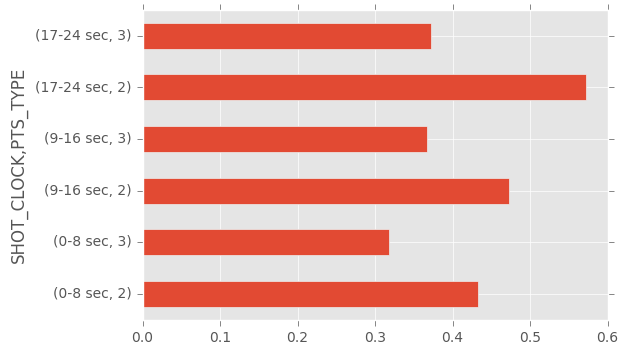

In [11]:
plt.style.use('ggplot')

df_grouped = df_imputed2.groupby(by=['SHOT_CLOCK','PTS_TYPE'])
shooting_percentage = df_grouped.SHOT_RESULT.sum() / df_grouped.SHOT_RESULT.count()
ax = shooting_percentage.plot(kind='barh')

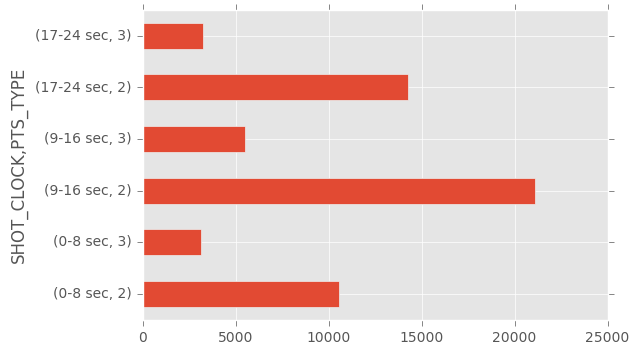

In [12]:
plt.style.use('ggplot')

df_grouped = df_imputed2.groupby(by=['SHOT_CLOCK','PTS_TYPE'])
shooting_percentage = df_grouped.SHOT_RESULT.sum()
ax = shooting_percentage.plot(kind='barh')

SHOT_RESULT      False  True 
PERIOD PTS_TYPE              
1      2         13217  12620
       3          4979   2994
2      2         11938  11435
       3          5281   2822
3      2         11983  11669
       3          5374   3038
4      2         10459   9876
       3          5784   2929
5      2           359    272
       3           187     84
6      2            56     61
       3            39     12
7      2            17     12
       3            10      4


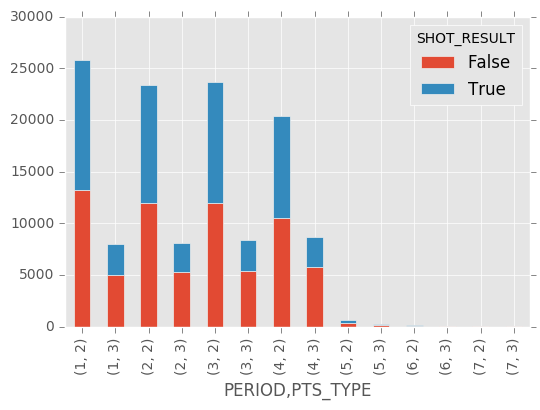

In [13]:
quarterShots = pd.crosstab([df_imputed2['PERIOD'], df_imputed2['PTS_TYPE']], 
                       df_imputed2.SHOT_RESULT.astype(bool))
print(quarterShots)

quarterShots.plot(kind='bar', stacked=True)

In [14]:
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

In [15]:
for col in ['GAME_ID','MATCHUP','LOCATION','FINAL_MARGIN','SHOT_NUMBER','CLOSEST_DEFENDER','CLOSEST_DEFENDER_PLAYER_ID','FGM','PTS','PLAYER_NAME','PLAYER_ID']:
    if col in df_imputed2:
        del df_imputed2[col]

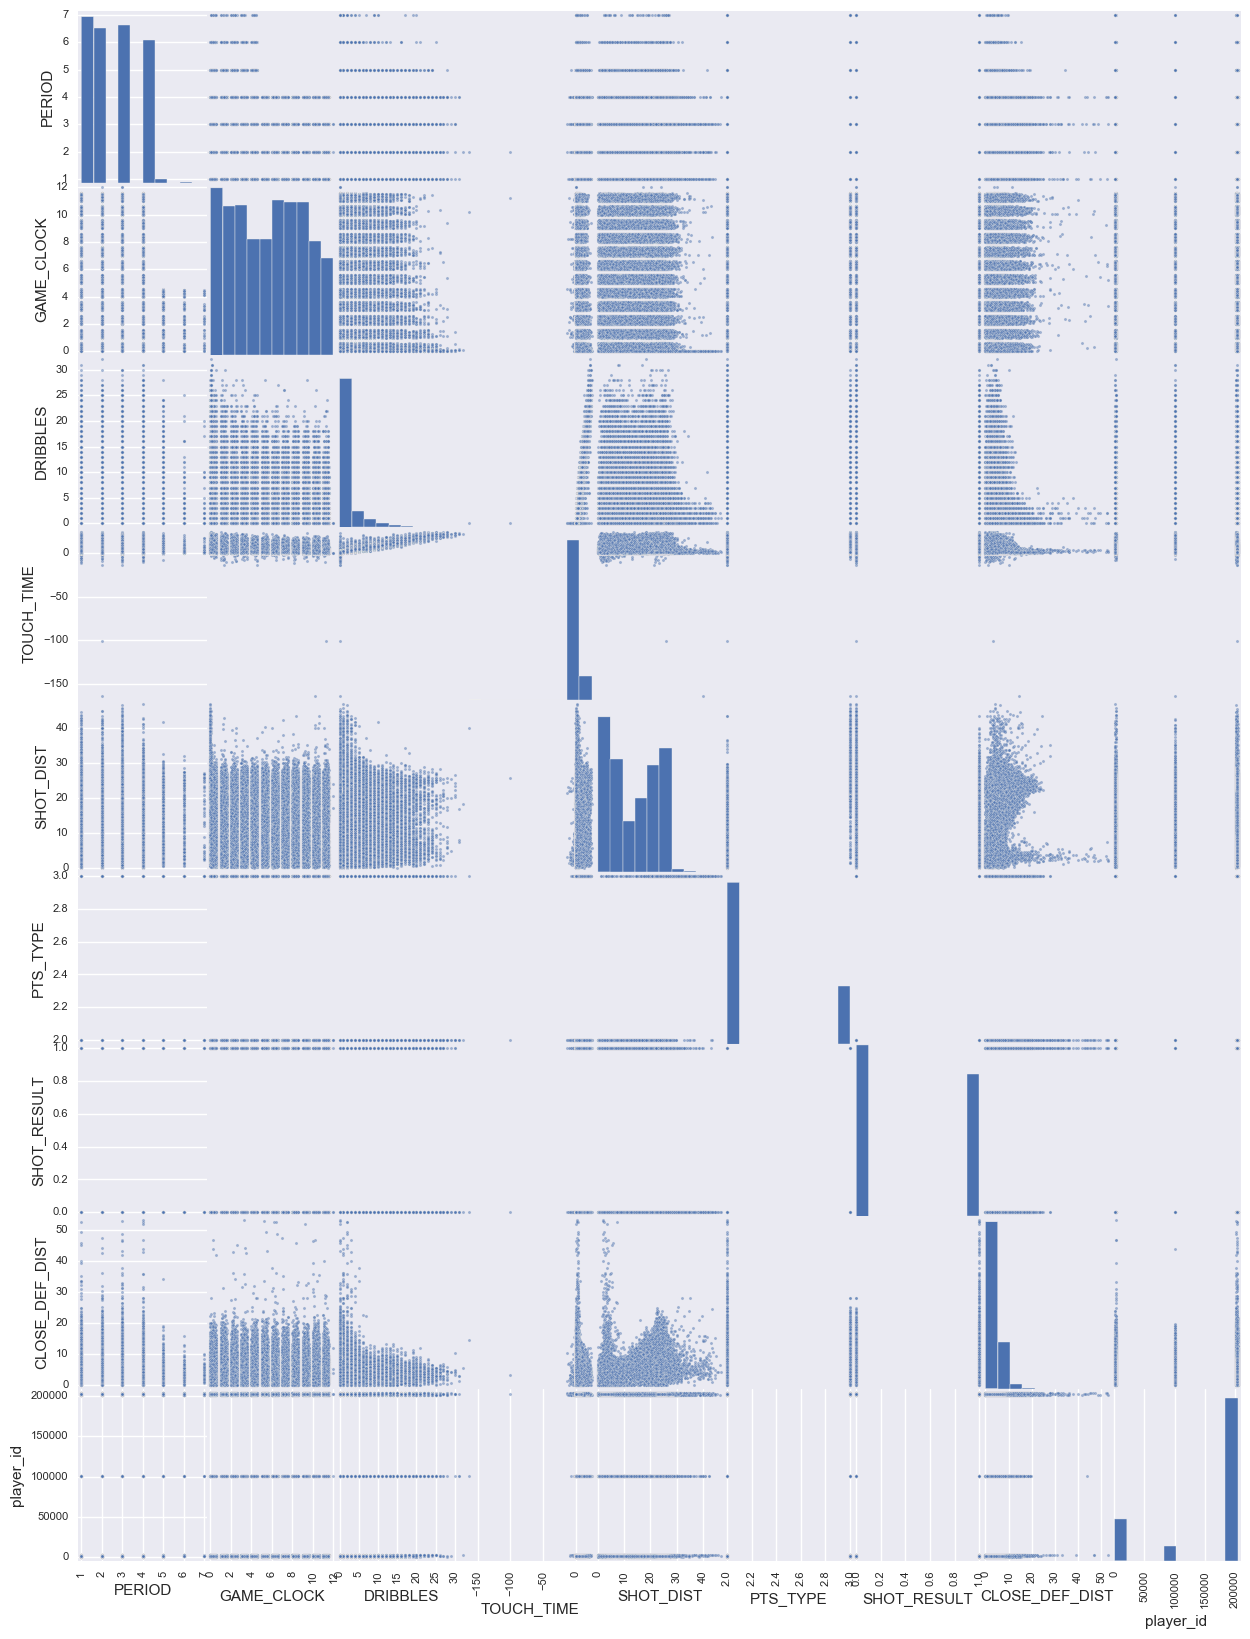

In [17]:
ax = scatter_matrix(df_imputed2,figsize=(15, 20))

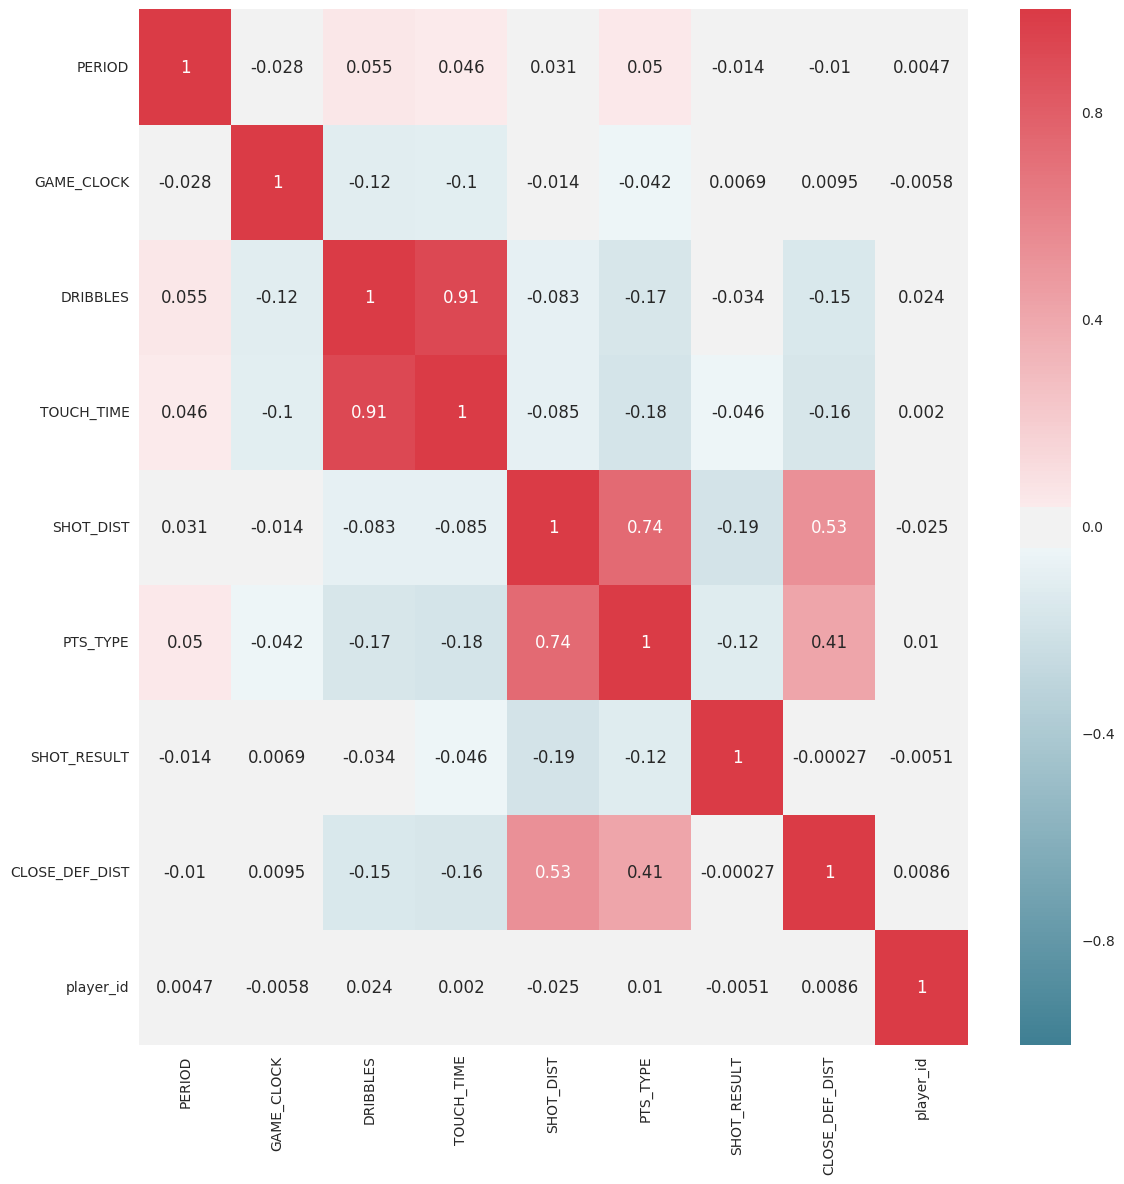

In [18]:
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(df_imputed2.corr(), cmap=cmap, annot=True)

f.tight_layout()

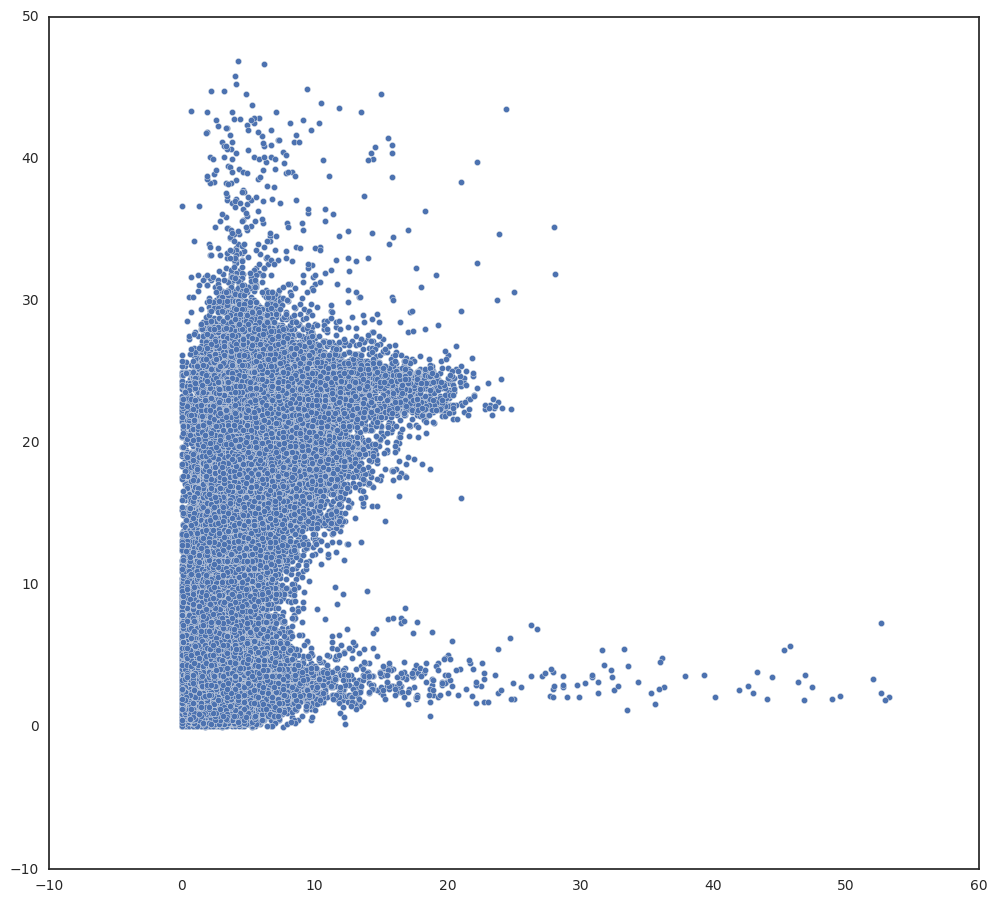

In [21]:
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(df_imputed2.CLOSE_DEF_DIST, df_imputed2.SHOT_DIST)
plt.show()